Dieses Tutorial basiert auf dem [sehr guten Vergleich von Python und R](https://www.dataquest.io/blog/python-vs-r/) von Dataquest.

# Datenimport
Mit Pandas wird die CSV-Datei mit den NBA-Statistiken importiert. Dabei wird ein neues Objekt erzeugt, welches mit "nba" angesprochen werden kann.

In [1]:
import pandas
nba = pandas.read_csv("nba_2013.csv")

# Dimensionen der Daten
Wir lassen uns die "Abmessung" der Daten anzeigen. Dazu verwenden wir die Methode *shape* auf das Objekt *nba* (Punktsyntax). Es gibt 481 Zeilen mit 31 Spalten.

In [35]:
nba.shape

(481, 31)

# Überblick über die Daten
Wir lassen uns die erste Zeile anzeigen. Mit der Methode *head* auf das Objekt *nba* rufen wir die erste Zeile (mit Daten) auf. Die Zeile 0 enthät die Spaltenbeschriftungen.

In [36]:
nba.head(1)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013


# Durchschnitte berechnen
Mit der Methode "mean" berechnen wir die Durchschnitte aller Werte. Eine Übersicht, was die Werte bedeuten finden man [hier](https://www.nba.com/stats/help/glossary/).

Python berechnet automatisch die Mittelwerte in allen gefundenen Spalten. Spalten mit nicht-nummerische Daten werden ignoriert.

In [37]:
nba.mean()

age             26.509356
g               53.253638
gs              25.571726
mp            1237.386694
fg             192.881497
fga            424.463617
fg.              0.436436
x3p             39.613306
x3pa           110.130977
x3p.             0.285111
x2p            153.268191
x2pa           314.332640
x2p.             0.466947
efg.             0.480752
ft              91.205821
fta            120.642412
ft.              0.722419
orb             55.810811
drb            162.817048
trb            218.627859
ast            112.536383
stl             39.280665
blk             24.103950
tov             71.862786
pf             105.869023
pts            516.582121
season_end    2013.000000
dtype: float64

# Plots vorbereiten
Wir binden die matplotlib als *plt* ein. *seaborn* ist ein Layer, der über der *matplotlib* liegt und uns diverse spezielle Plots ermöglicht.

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Die Plots zeichnen
Zunächst wählen wir die Variablen aus, die dann paarweise (*pairplot*) gegeneinander aufgetragen werden (Assists (Zuspiel mit anschließendem Punktgewinn), Field Goals (Körbe aus dem laufenden Spiel)), Field Goal Attempted (Wurfversuche aus dem laufenden Spiel)).

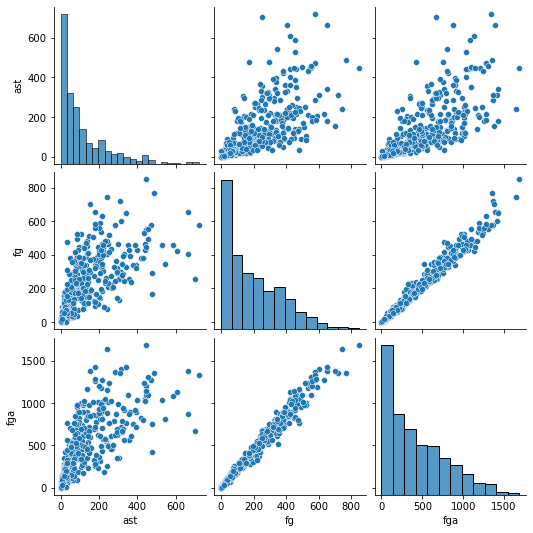

In [39]:
sns.pairplot(nba[["ast", "fg", "fga"]])
plt.show()

# scikit-learn einbinden
Wir binden die Bibliothek *scikit-learn* ein. Diese kann uns mithilfe von **machine learning** unterstützden, die Daten in Gruppen mit ähnlichen Merkmalen aufzuteilen (Cluster).

In [40]:
from sklearn.cluster import KMeans

# Modelierung der Cluster
Wir verwenden einen Algorithmus, der [**k-Means**](https://de.wikipedia.org/wiki/K-Means-Algorithmus) genannt wird. Wir wollen 5 Cluster bilden. Der Algorithmus versucht nun 5 Cluster zu finden, in welchen die Summe der quadrierten Abweichungen (Methode der kleinsten Quadrate) vom Cluster-Schwerpunkt minimal ist.


In [41]:
kmeans_model = KMeans(n_clusters=5, random_state=1)

# Daten bereinigen
Wir bereinigen die Daten, indem wir Spalten mit nicht-nummerischen Daten loswerden und Spalten mit fehlenden Werten eliminieren.

In [42]:
good_columns = nba._get_numeric_data().dropna(axis=1)

# Daten zum Modell
Jetzt können die (bereinigten) Daten ins Modell geladen werden

In [43]:
kmeans_model.fit(good_columns)

KMeans(n_clusters=5, random_state=1)

# Beschriften

In [44]:
labels = kmeans_model.labels_

In [45]:
from sklearn.decomposition import PCA

# Hauptkomponentenanalyse
Mit der Funktion PCA (deutsch [HKA=Hauptkomponentenanalyse](https://de.wikipedia.org/wiki/Hauptkomponentenanalyse)) aus der scikit-learn-Bibliothek bereiten wir die Daten auf.

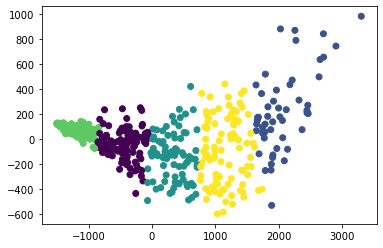

In [46]:
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(good_columns)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.show()

# Testdaten und Trainingsdaten
Jetzt ist es sinnvoll, die Trainingsdaten und die Testdaten zu trennen. Ansonsten kann es zu **Überanpassung** (overfit) kommen. Das bedeutet, dass der Algorithmus zu viele Variablen zur Erklärung auswählt.

Dies ist im folgenden Beispiel gut zu sehen. Die grüne Linie trennt sauber die roten von den blauen Datenpunkten. Der Preis ist eine unglaubliche Komplexität dieser Kurve. Diese Kurve funktioniert bei den Trainingsdaten perfekt. In einem anderen Datensatz wird diese Linie aber im Durchschnitt ungenauer sein, als die normalisierte schwarze Kurve, die zudem mit viel weniger Variablen auskommt.

![overfit](https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Overfitting.svg/500px-Overfitting.svg.png)

In [47]:
train = nba.sample(frac=0.8, random_state=1)
test = nba.loc[~nba.index.isin(train.index)]

In [48]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train[["fg"]], train["ast"])
predictions = lr.predict(test[["fg"]])

In [49]:
import statsmodels.formula.api as sm
model = sm.ols(formula='ast ~ fga', data=train)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ast   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     492.1
Date:                Mon, 23 Nov 2020   Prob (F-statistic):           1.03e-70
Time:                        16:44:34   Log-Likelihood:                -2273.3
No. Observations:                 385   AIC:                             4551.
Df Residuals:                     383   BIC:                             4559.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3302      6.855     -0.340      0.734     -15.808      11.147
fga            0.2712      0.012     22.183      0.000       0.247       0.295
==============================================================================
Omnibus:                      162.497   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              849.356
Skew:                           1.744   Prob(JB):                    3.67e-185
Kurtosis:                       9.386   Cond. No.                         847.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
from sklearn.ensemble import RandomForestRegressor
predictor_columns = ["age", "mp", "fg", "trb", "stl", "blk"]
rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=3)
rf.fit(train[predictor_columns], train["ast"])
predictions = rf.predict(test[predictor_columns])

In [51]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test["ast"], predictions)

5108.613457863964